# Image Classifier Based on Cars and Human Faces
Gather Data: Done Manually

Preprocess data

Apply any classification Algorithm with best parameters using GridSearch CV

Evaluate the model using Confusion Matrix and classification report: Showing Accuracy 96.2% for the given images in car and faces.

Predict for any new Image



In [ ]:
!rm -r Simple-Image-Classifier
!git clone https://github.com/AmreshSinha/Simple-Image-Classifier.git

rm: cannot remove 'Simple-Image-Classifier': No such file or directory
Cloning into 'Simple-Image-Classifier'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 158 (delta 5), reused 151 (delta 3), pack-reused 0
Receiving objects: 100% (158/158), 70.35 MiB | 40.79 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
# Tells Time Evaluated
!pip install ipython-autotime
%load_ext autotime

time: 207 µs (started: 2021-03-30 12:24:03 +00:00)


In [ ]:
# Preprocessing
# Resize
# Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pandas as pd


target = []
images = []
flat_data = []

DATADIR = '/content/Simple-Image-Classifier/images'
CATEGORIES = ['cars','faces']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  # /content/Simple-Image-Classifier/images/cars
  # /content/Simple-Image-Classifier/images/faces
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 22.8 s (started: 2021-03-30 12:24:07 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

time: 4.59 ms (started: 2021-03-30 12:24:41 +00:00)


<BarContainer object of 2 artists>

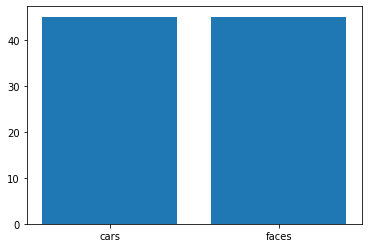

time: 159 ms (started: 2021-03-30 12:24:44 +00:00)


In [ ]:
unique, count = np.unique(target,return_counts = True)
plt.bar(CATEGORIES,count)

In [ ]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                    test_size=0.3,random_state=109)

time: 255 ms (started: 2021-03-30 12:24:48 +00:00)


In [ ]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
         {'C':[1,10,100,1000],'kernel':['linear']},
         {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 24s (started: 2021-03-30 12:24:51 +00:00)


In [ ]:
 # Checking Accuracy
 y_pred = clf.predict(x_test)
 y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1])

time: 116 ms (started: 2021-03-30 12:26:21 +00:00)


In [ ]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1])

time: 5.34 ms (started: 2021-03-30 12:26:23 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.4 ms (started: 2021-03-30 12:26:25 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.9629629629629629

time: 9.37 ms (started: 2021-03-30 12:26:27 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[12,  0],
       [ 1, 14]])

time: 5.99 ms (started: 2021-03-30 12:26:29 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 31.7 ms (started: 2021-03-30 12:26:31 +00:00)


In [ ]:
 model = pickle.load(open('img_model.p','rb'))

time: 26.4 ms (started: 2021-03-30 12:26:33 +00:00)


In [ ]:
# Testing

flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output of the Image: {y_out}')

KeyboardInterrupt: ignored

time: 1min 50s (started: 2021-03-30 12:27:11 +00:00)


In [ ]:
# Streamlit WebApp Link
# https://colab.research.google.com/drive/14AXwsyWuU3Ubejk06ZtDfnmunenkYxHX?usp=sharing

time: 2.77 ms (started: 2021-03-30 13:30:20 +00:00)
